In [1]:
import numpy as np
import pandas as pd

import string
import spacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

np.random.seed(42)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/iampukar/toxic-comments-classification/master/train.csv")

In [3]:
data = data.head(500)

In [4]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
495,014b44616d8cb457,"Sarek of Vulcan: Unfortunately for you, you ca...",0,0,0,0,0,0
496,014bb932bd289352,Keep your chin up! Darwinism was not accepted ...,0,0,0,0,0,0
497,014c96f873db11ff,"""""""Nazi filth"""" is impolite 04:27, 20 Jan 200...",1,0,0,0,1,0
498,014d00c8f2a76df4,Interesting. I checked the other case number K...,0,0,0,0,0,0


In [5]:
data['toxic'].value_counts()

0    451
1     49
Name: toxic, dtype: int64

In [34]:
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words
print(stop_words)

{"'s", 'therefore', 'already', 'anything', 'unless', 'often', 'there', 'eight', 'have', 'anyhow', 'most', 'elsewhere', 'please', 'eleven', 'it', 'mine', 'get', 'using', '’s', 'side', 'no', '’re', 'due', 'out', 'only', 'seems', 'beforehand', 'full', 'neither', 'should', "'ll", 'top', 'who', 'say', 'twenty', 'two', 'becoming', 'perhaps', 'within', 'serious', 'myself', 'per', 'rather', 'everyone', 'next', 'herein', 'though', 'while', 'same', 'this', 'hereby', 'former', 'quite', 'over', 'now', 'behind', 'anywhere', 'before', 'still', 'be', 'is', 'go', '’d', 'thru', "n't", 'the', 'fifteen', 'indeed', 'made', 'after', 'whole', 'whereupon', 'among', 'back', 'however', 'upon', 'something', 'everywhere', 'those', 'make', 'empty', 'whereas', 'together', 'me', 're', 'here', 'hundred', 'during', 'than', 'n‘t', 'when', 'of', 'yours', 'sometimes', 'five', 'latterly', "'re", 'thus', 'sometime', 'seemed', 'anyone', 'where', 'doing', '’m', 'each', '‘s', 'done', 'may', 'someone', 'because', 'none', 'reg

In [35]:
puncs = string.punctuation
print(puncs)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# creating our tokenizer function

def spacy_tokenizer(sentence):

  doc = nlp(sentence)

  mytokens = [word.lemma_.lower().strip() for word in doc]

  #removing stopwords
  mytokens = [word for word in mytokens if word not in stop_words and word not in puncs]

  return mytokens

In [ ]:
spacy_tokenizer('I am eating apple?')

['eat', 'apple']

In [ ]:
spacy_tokenizer(data['comment_text'][0])

['explanation',
 'edit',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'revert',
 'vandalism',
 'closure',
 'gas',
 'vote',
 'new',
 'york',
 'dolls',
 'fac',
 'remove',
 'template',
 'talk',
 'page',
 'retire',
 'now.89.205.38.27']

In [ ]:
count_vector = CountVectorizer(tokenizer=spacy_tokenizer)


In [ ]:
count_vector.fit_transform(['I am eating an apple.','I am playing cricket']).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[1, 0, 1, 0],
       [0, 1, 0, 1]])

In [ ]:
count_vector.get_feature_names_out()

array(['apple', 'cricket', 'eat', 'play'], dtype=object)

In [ ]:
count_vector.vocabulary_

{'eat': 2, 'apple': 0, 'play': 3, 'cricket': 1}

In [ ]:
from sklearn.model_selection import train_test_split

X = data['comment_text']
y= data['toxic']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
X_train_vectors = count_vector.fit_transform(X_train)
X_test_vectors = count_vector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_vectors.shape

(400, 4176)

In [ ]:
X_test_vectors.shape

(100, 4176)

In [ ]:
model.fit(X_train_vectors,y_train)

LogisticRegression()

In [ ]:
predicted = model.predict(X_test_vectors)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.92
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.2


In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)
X_train_vectors_tf= tfidf_vector.fit_transform(X_train)
X_test_vectors_tf= tfidf_vector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_vectors_tf,y_train)
predicted = classifier.predict(X_test_vectors_tf)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### text classification using Word2Vec, Gensim

In [6]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


- Use pretrained word vectors

In [7]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [8]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
import spacy
import string

In [21]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
gensim.__version__

'4.3.2'

In [10]:
np.random.seed(42)

### use pretrained word vectors

In [11]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [12]:
wv = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [13]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [14]:
wv['apple']

array([ 5.1418e-01, -1.9196e-01, -7.9963e-01,  9.1339e-01, -5.7061e-01,
        7.1746e-01, -5.8979e-01, -5.1530e-01,  1.3453e+00, -2.0792e-01,
        4.4555e-01,  2.4981e-01, -3.2020e+00,  3.5736e-01, -2.3593e-02,
       -3.1158e-02,  3.7782e-01,  6.4447e-01,  1.2056e+00, -1.0553e-01,
       -8.9697e-01, -7.9754e-01,  2.0239e-01, -1.0664e+00, -4.7167e-01,
       -2.5953e-01,  1.1328e-01, -3.8142e-01,  2.0366e-03, -5.0261e-01,
       -2.5197e-01, -8.4033e-02, -1.0015e+00, -8.6835e-01,  6.6201e-01,
        2.6496e-01,  2.2570e-01, -3.3847e-01, -3.4739e-01,  6.2199e-01,
       -1.3491e+00, -1.7497e-01, -1.1490e+00,  1.5144e-01,  1.1255e+00,
       -6.2668e-01, -3.4274e-01, -3.4938e-01, -1.0806e+00,  6.0174e-01],
      dtype=float32)

In [15]:
len(wv['apple'])

50

In [17]:
wv.similarity('apple','fruit')

0.6031972

In [20]:
wv.similarity('apple','india')

0.48245794

In [22]:
# wv = api.load('word2vec-google-news-300')
# wv.save('/content/drive/MyDrive/Content Creation/Youtube Tutorials/vectors.kv')

In [24]:
wv.most_similar(positive=['cricket'],topn=5)

[('ipl', 0.7958959341049194),
 ('lanka', 0.7769297361373901),
 ('dhoni', 0.7549805045127869),
 ('england', 0.7547726035118103),
 ('batsman', 0.7408652901649475)]

### Semantic regularities captured in word embeddings

In [25]:
wv.most_similar(positive=['woman','king'],negative=['man'],topn=5)

[('prince', 0.759779691696167),
 ('stone', 0.7595877051353455),
 ('queen', 0.754626989364624),
 ('meets', 0.7404001355171204),
 ('royal', 0.7376410365104675)]

In [26]:
wv.most_similar(positive=['woman','king'],topn=5)

[('guy', 0.8665385246276855),
 ('called', 0.8582760095596313),
 ('mother', 0.8502708077430725),
 ('the', 0.8489276766777039),
 ('kid', 0.8451408743858337)]

In [27]:
words = ['one','two','man','woman','football']

In [29]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.05999643, -1.287819  ],
       [ 0.5256737 , -1.9996253 ],
       [-1.6206409 ,  2.4381    ],
       [-1.941386  , -0.45562246],
       [ 3.096349  ,  1.3049668 ]], dtype=float32)

#### visualizing word vectors


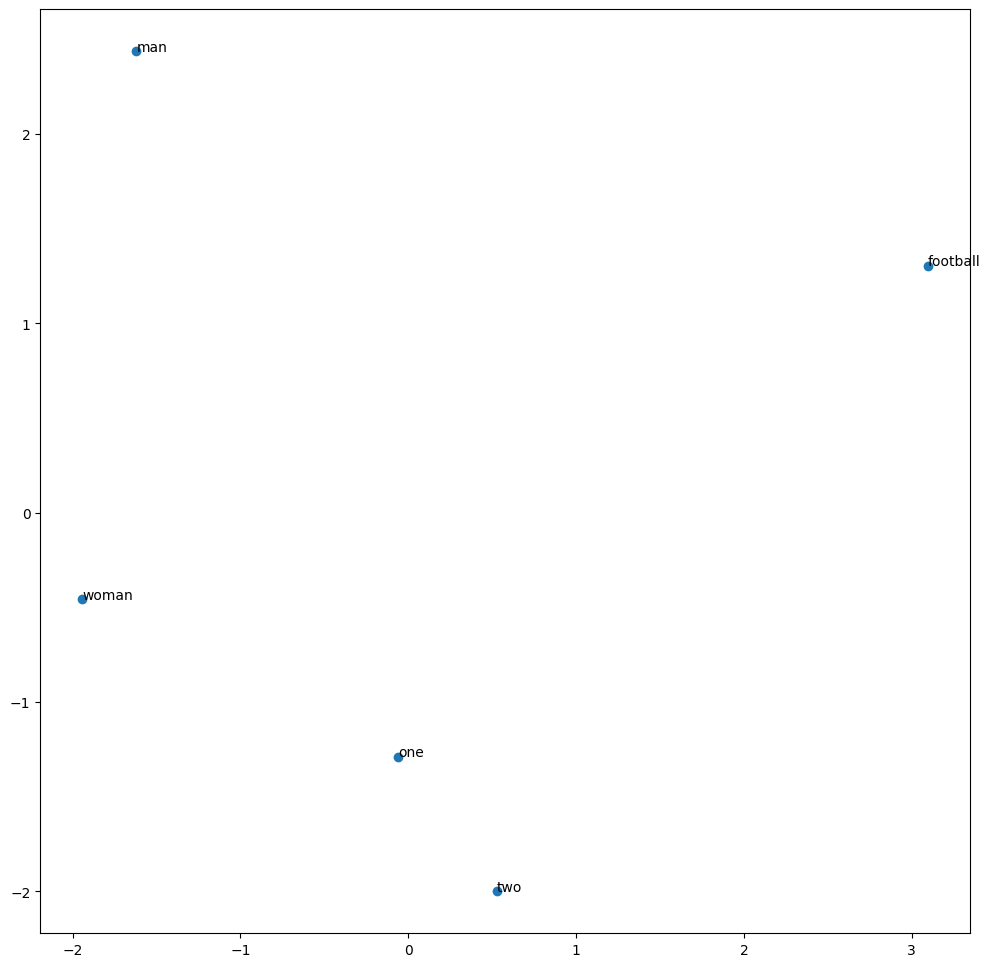

In [31]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0],result[:,1])
for i, word in enumerate(words):
  plt.annotate(word,xy=(result[i,0],result[i,1]))

plt.show()

In [32]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [33]:
def spacy_tokenizer(sentence):

  doc = nlp(sentence)

  mytokens = [word.lemma_.lower().strip() for word in doc]

  #removing stopwords
  mytokens = [word for word in mytokens if word not in stop_words and word not in puncs]

  return mytokens

In [37]:
sent_vec('Hello guys!')

array([ 0.1720156 ,  0.007517  , -0.0477985 , -0.16520431, -0.1059365 ,
        0.0129232 , -0.44555999,  0.25460939,  0.024908  ,  0.549218  ,
       -0.0422964 , -0.0323738 , -2.81343002,  0.08957993, -0.2115627 ,
       -0.17263161, -0.356782  , -0.07792366, -0.230262  ,  0.79375901,
       -0.043653  , -0.102198  ,  0.18835311,  0.48430601,  0.0838338 ,
       -1.48342098, -0.1547177 , -0.07501864,  0.4729321 ,  0.39563601,
       -0.1847744 , -0.1793037 , -0.1270612 ,  0.1224599 ,  0.72284601,
        0.17090729, -0.2561523 , -0.331919  , -0.6292636 ,  0.4036167 ,
       -2.26652002,  0.1553506 ,  0.4065154 , -0.1988623 , -0.03656431,
       -0.0921702 ,  0.0113664 , -0.4136817 ,  0.1317358 , -0.630216  ])

In [38]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [39]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, edit, username, hardcore, metall..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d'aww, match, background, colour, seemingly, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, try, edit, war, guy, constantly, re..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[real, suggestion, improvement, wonder, sectio..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chance, remember, page]"


In [40]:
data['vec'] = data['tokens'].apply(sent_vec)

In [41]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens,vec
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, edit, username, hardcore, metall...","[0.015928618432510467, 0.2440322403396879, -0...."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d'aww, match, background, colour, seemingly, ...","[0.1327195411378687, -0.047860176895152436, 0...."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, try, edit, war, guy, constantly, re...","[0.3781950518488884, 0.42222509644925593, -0.2..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[real, suggestion, improvement, wonder, sectio...","[0.31190393590254756, 0.23877963087544207, -0...."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chance, remember, page]","[0.21403166900078455, 0.08245500673850377, 0.1..."


In [42]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [43]:
X[0]

array([ 1.59286184e-02,  2.44032240e-01, -3.07448998e-01,  2.66524046e-02,
        2.89859050e-01, -2.78400665e-01,  7.22143332e-01, -1.53086905e-01,
        2.60989427e-01, -1.12669004e-01,  9.93261933e-02, -1.10733009e-01,
       -2.41487378e+00, -2.17145811e-01, -7.96607131e-02, -3.62604936e-03,
        2.45657192e-02,  4.38095746e-02,  2.55404739e-02,  2.81655682e-02,
       -1.99015048e-01, -2.00250464e-02, -4.89679337e-02, -2.76274761e-01,
       -2.11624853e-01,  6.36790487e-02,  1.99229052e-01,  2.49096653e-01,
       -9.42601420e-02,  1.46287235e-01,  6.32614245e-02,  2.16426209e-02,
       -1.50946686e-02, -3.19880003e-01,  5.01512629e-01, -1.05121901e-01,
        3.29246674e-02, -5.89493767e-02,  2.44842417e-02, -1.65065571e-01,
       -2.81498721e-01,  1.55484322e-02,  1.14639476e-01, -2.08428640e-03,
       -5.05275247e-02, -1.03587952e-01, -1.27855431e-01,  3.50050256e-02,
       -1.31921764e-01, -1.35190807e-01])

In [44]:
y[0]

0

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [47]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [48]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.95
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.5
